In [2]:
#import libraries 
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

## Let's load the council distrcit data and look at the first few rows
(https://data.nashville.gov/General-Government/Council-District-Outlines-GIS-/m4q4-q7tc)

#### Mapping where the the public works projects are and how much money are going into them can show where Metro is investing its resources. I'm interested to see if the projects and money is spread out evenly (population should be about the same in each district, although the more densely populated districts likely have more roads, parks, etc. that need projects), or if the resources tend to be concentrated in the wealthier or up and coming areas where real estate development is occuring.

In [3]:
districts = gpd.read_file('./data/Council District Outlines (GIS).geojson')
districts.head(1)

,first_name,email,res_phone,bus_phone,last_name,position,district,geometry
0,Nick,nick.leonardo@nashville.gov,615-509-6334,615-862-6780,Leonardo,Council Member,1,(POLYGON ((-86.90738248774342 36.3905151283193...


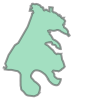

In [4]:
# look at shape of first one

districts.loc[0, 'geometry']

### Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() function

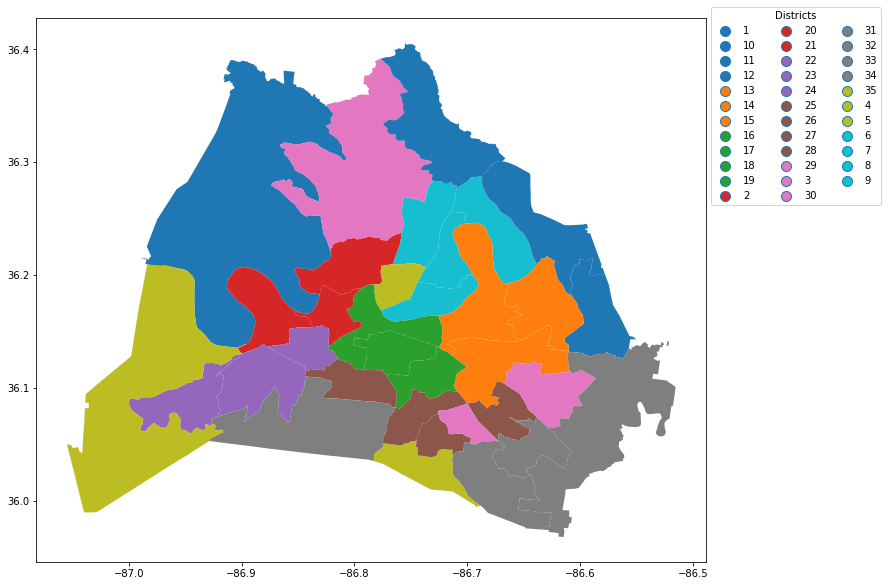

In [5]:
#geopandas handles legend styling if you pass a dict of keywords
leg_kwds = {'title': 'Districts', 'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 3}
districts.plot(column = 'district', figsize=(12, 12), legend = True, legend_kwds = leg_kwds)
plt.show()

### Let's try to find the council district with the most Metro Public Works projects

https://data.nashville.gov/Public-Services/Metro-Public-Works-Capital-Projects/4bez-eha9

In [6]:
pworks = pd.read_csv('./data/Metro_Public_Works_Capital_Projects.csv')
pworks.head()


,CP ID,Project Number,Project Category,Project Type,Project Name,Project Location,Description,Justification,Council District,Plan Cost,...,Project SubType,Priority,Phase,PPA Number,x Coordinate,y Coordinate,Latitude,Longitude,Map URL,Mapped Location
0,5274,NaN,Traffic,New Traffic Signal,Metro Fire Station No 19 - Traffic Signal,AT CHARLOTTE AVE AND 26TH AVENUE NORTH,Install/modify intersection control features,To provide traffic control features that will ...,21,5936.00,...,New,Medium,Complete,130-03016,1.727710e+06,663933.196954,36.154530,-86.815630,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.15452982, -86.81562974)"
1,53,NaN,Sidewalk,Sidewalk Repairs,Woodland Street Sidewalk Repairs,Woodland Street from South 2nd Street to Inter...,Sidewalk repairs,To provide safer pedestrian access to nearby b...,06,45053.00,...,Maintenance/Repairs,Medium,Complete,98-01016,1.741303e+06,669479.220891,36.170067,-86.769735,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.17006717, -86.76973504)"
2,5369,NaN,Bikeway,NaN,Music Row E From 16th Ave S To Buddy Killen Cir,On Music Row E From 16th Ave S To Buddy Killen...,New protected bike lane,"To provide safer cyclist route, connectivity t...",19,44700.00,...,New,Medium,Complete,1058-03013,1.734505e+06,661045.920654,36.146759,-86.792541,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.14675893, -86.79254128)"
3,146,NaN,Bikeway,Protected Bike Lane,28th Avenue North,28th Avenue North from Charlotte Avenue to Par...,New Protected Bike Lane,"To provide safer cyclist route, connectivity t...",21,0.00,...,New,Medium,Complete,899-03014,1.726708e+06,662949.225246,36.151770,-86.819027,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.15177019, -86.81902664)"
4,5179,NaN,Bridge,Maintenance and Repair Jobs,Cheyenne Boulevard,On CHEYENNE BLVD Between CHEYENNE TRCE And CAN...,Repair damaged handrail,Repair handrail to ensure safe passage of pede...,09,7843.32,...,Maintenance/Repairs,Medium,Complete,257-02015,1.770788e+06,698568.691712,36.250568,-86.670521,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.25056779, -86.67052115)"


In [10]:
pworks.columns = ['cp_id', 'project_number', 'project_category', 
                  'project_type', 'project_name', 'project_location', 
                  'description', 'justification', 'council_district', 
                  'plan_cost', 'estimated_cost', 'actual_cost', 'project_cost',
                  'percent_spent', 'estimated_start', 'estimated_ end', 'actual_start',
                  'actual_end', 'status', 'notes', 'project_subtype', 'priority',
                  'phase', 'ppa_number', 'x_coord', 'y_coord', 'lat', 'lng', 'map_url', 'map_geometry']
pworks['geometry'] = pworks.apply(lambda x: Point((float(x.lng), float(x.lat))), axis = 1)



In [12]:
print(pworks.head(2))

   cp_id project_number project_category        project_type  \
0   5274            NaN          Traffic  New Traffic Signal   
1     53            NaN         Sidewalk    Sidewalk Repairs   

                                project_name  \
0  Metro Fire Station No 19 - Traffic Signal   
1           Woodland Street Sidewalk Repairs   

                                    project_location  \
0             AT CHARLOTTE AVE AND 26TH AVENUE NORTH   
1  Woodland Street from South 2nd Street to Inter...   

                                    description  \
0  Install/modify intersection control features   
1                              Sidewalk repairs   

                                       justification council_district  \
0  To provide traffic control features that will ...               21   
1  To provide safer pedestrian access to nearby b...               06   

   plan_cost                   ...                    priority     phase  \
0     5936.0                   ...         

### Now that pworks has a geometry field, we can convert it from a DataFrame to a GeoDataFrame - we want the CRS to match the CRS in the neighborhoods GeoDataFrame so we set it to that

In [13]:
pworks_geo = gpd.GeoDataFrame(pworks, crs = districts.crs, geometry = pworks['geometry'])



## Now we're ready to combine the council districts and the public works projects with a spatial join

In [14]:
district_pwork = gpd.sjoin(pworks_geo, districts, op = 'within')

## Now that the data is joined spatially we can aggregate the public works projects by council district and see how many public works projects are within each polygon

In [15]:

district_pwork[['council_district', 'project_name']].groupby('council_district').agg('count').sort_values(by ='project_name', ascending = False)



,project_name
council_district,
19,97
35,87
01,86
10,74
03,69
08,61
17,61
22,57
23,47


### Subset the district_pwork to get only the public works projects that are in Council District 19


In [29]:
dist_19 = district_pwork.loc[district_pwork.council_district == '19']
dist_19.head()

,cp_id,project_number,project_category,project_type,project_name,project_location,description,justification,council_district,plan_cost,...,map_geometry,geometry,index_right,first_name,email,res_phone,bus_phone,last_name,position,district
2,5369,NaN,Bikeway,NaN,Music Row E From 16th Ave S To Buddy Killen Cir,On Music Row E From 16th Ave S To Buddy Killen...,New protected bike lane,"To provide safer cyclist route, connectivity t...",19,44700.00,...,"(36.14675893, -86.79254128)",POINT (-86.79254127999999 36.14675893),12,Freddie,freddie.oconnell@nashville.gov,615-260-0005,615-862-6780,O'Connell,Council Member,19
11,5251,NaN,Traffic,Intersection Improvements,Hermitage Avenue Lane Use Signals,ON HERMITAGE AVE BETWEEN FAIRFIELD AVENUE AND ...,Install lane use signals and signage,To provide lane use signals for the reversible...,19,470930.72,...,"(36.15480755, -86.75853703)",POINT (-86.75853703 36.15480755),12,Freddie,freddie.oconnell@nashville.gov,615-260-0005,615-862-6780,O'Connell,Council Member,19
43,143,NaN,Bikeway,Bike Lane,Jefferson Street,Jefferson Street from 5th Avenue North to 3rd ...,New Bike Lane,"To provide safer cyclist route, connectivity t...",19,0.00,...,"(36.17470016, -86.78604726)",POINT (-86.78604726 36.17470016),12,Freddie,freddie.oconnell@nashville.gov,615-260-0005,615-862-6780,O'Connell,Council Member,19
60,1641,19SUM18017,Paving,19SUM18017,21ST AVE S - PVMNT JOINT 150' S OF WEST END AV...,21ST AVE S - PVMNT JOINT 150' S OF WEST END AV...,ROADWAY RESURFACING PAVING PROJECT ON '21ST AV...,"BASED ON THE CURRENT OVERALL CONDITION INDEX, ...",19,43305.50,...,"(36.14923453, -86.80025618)",POINT (-86.80025618000001 36.14923453),12,Freddie,freddie.oconnell@nashville.gov,615-260-0005,615-862-6780,O'Connell,Council Member,19
97,606,PV-SPR-10844,Paving,PV-SPR-10844,GARFIELD ST - DELTA AV - 9TH AV N,GARFIELD ST - DELTA AV - 9TH AV N,ROADWAY RESURFACING PAVING PROJECT ON 'GARFIEL...,"BASED ON THE CURRENT OVERALL CONDITION INDEX, ...",19,17000.00,...,"(36.17930714, -86.79885069)",POINT (-86.79885068999999 36.17930714),12,Freddie,freddie.oconnell@nashville.gov,615-260-0005,615-862-6780,O'Connell,Council Member,19


### Get just the Council District 19 polygon from the districts data and take a look at it



In [30]:
dist19_polygon = districts.loc[districts.district == '19']
dist19_polygon.head() 

,first_name,email,res_phone,bus_phone,last_name,position,district,geometry
12,Freddie,freddie.oconnell@nashville.gov,615-260-0005,615-862-6780,O'Connell,Council Member,19,(POLYGON ((-86.78203399966463 36.1878720002229...


### Plot Council District 19 and add our public works projects

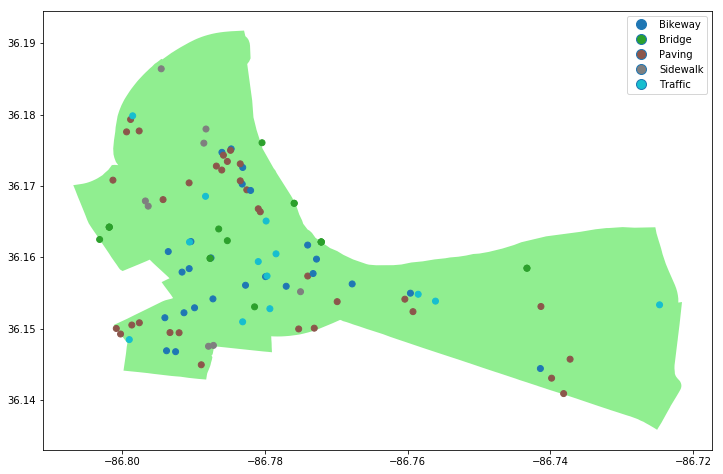

In [34]:
ax = dist19_polygon.plot(figsize = (12, 12), color = 'lightgreen')
dist_19.plot( ax = ax, column = 'project_category', legend = True);
plt.show();

### The folium map wants a center point for the street map. We'll make use of a GeoSeries attribute (.centroid) which gives us the center of a polygon.


In [35]:
#find the center of our urban_polygon and look at it
dist19_polygon.geometry.centroid

12    POINT (-86.76741647315878 36.1595422466424)
dtype: object

In [36]:
# find the center of the district 19 polygon with the centroid property
center = dist19_polygon.geometry.centroid

# get and store the first occurence which will be a Point geometry
center_point = center.iloc[0]

# print the types for center and center_point
print('center is :', type(center))
print('center_point is :', type(center_point))

center is : <class 'geopandas.geoseries.GeoSeries'>
center_point is : <class 'shapely.geometry.point.Point'>


In [37]:
# center point has longitude first
print(center_point)

# reverse the order when constructing the array for folium location
urban_center = [center_point.y, center_point.x]

# check the order of urban_center, the location we'll set for our folium map
print(urban_center)

POINT (-86.76741647315878 36.1595422466424)
[36.1595422466424, -86.76741647315878]


#### Use `urban_center` as the `location` of the folium map. A zoom level of 15 should get us nice and close.

In [38]:
#create our map of Nashville and show it
map_downtown = folium.Map(location =  urban_center, zoom_start = 15)
map_downtown